# Банки - сегментация пользователей по потреблению.

***Цель:*** *разработка рекомендаций по уменьшению оттока клиентов банка заказчику (менеджеру продукта).*

***Задача:*** *сегментировать клиентов банка по количеству потребляемых продуктов, обращая особое внимание на отток.*

# Материалы проекта

***Ссылка на презентацию:***
https://drive.google.com/file/d/1_fGnfpYxDuGz--FuZlI75GLCOYr34uu7/view?usp=sharing
***Ссылка на дашборд:*** https://public.tableau.com/views/dash_dipl_16798583992140/Dashboard2?:language=en-US&:display_count=n&:origin=viz_share_link

# Декомпозиция

* *Импорт библиотек, первичный обзор данных*
    + Импорт всех необходимых для анализа библиотек.
    + Загрузка данных.
    + Первичный обзор данных.
-------------------------

* *Предобработка данных*
    + Приведение наименований колонок к единому стилю.
    + Анализ соотвествия типов представленным данным.
    + Выявление и анализ пропусков в данных.
    + Проверка данных на явные и неявные дубликаты.
    + Выявление и обработка аномалий в данных.
-------------------------
* *Исследовательский анализ данных*
    + Выявление и анализ зависимостей в признаках, представленных в данных.
***********************
* *Сегментирование*
    + Анализ признаков в разрезе количества продуктов.
    + Анализ признаков в разрезе оттока.
    + Составление "портрета" пользователя по выявленным сегментам.
***********************
* *Проверка статистических гипотез*
    + Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
    + Формулирование и проверка ещё одной статистической гипотезы относительно представленных данных.
-----------------------
* *Выводы*
    + По результатам анализа сформулировать выводы и дать рекомендации по уменьшению оттока клиентов менеджеру продукта.

## Импорт библиотек и первичный обзор данных

In [1]:
#установка phik
! pip install phik

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
#загрузка данных
bank_datasets = pd.read_csv('C:\\Users\\Дарья\\Desktop\\project\\bank_dataset.csv')

In [4]:
#смотрим данные и информацию о них
def data_info(df):
    return display(df.head(10)), df.info(), display(df.describe())
data_info(bank_datasets)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


(None, None, None)

* **Первое знакомство с данными, итоги**:
    + наименования столбцов не в едином стиле;
    + пропуски в одном столбце из 12;
    + типы данных соответствуют данным;
    + в числовых характеристиках данных можно заметить аномально низкую з/п в столбце estimated_salary, с учетом  средней з/п.

## Предобработка

In [5]:
# приведем наименования столбцов к нижнему регистру и приведем к единому стилю
bank_datasets.columns = bank_datasets.columns.str.lower()
bank_datasets = bank_datasets.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})

bank_datasets.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [6]:
#посчитаем пропущенные значения 
pd.DataFrame(round((bank_datasets.isna().mean()*100),1))#.style.background_gradient()

,0
user_id,0.0
score,0.0
city,0.0
gender,0.0
age,0.0
objects,0.0
balance,36.2
products,0.0
credit_card,0.0
loyalty,0.0


36% пропусков в балансе - слишком много, чтобы удалить. Заменить пропущенные значения на 0 некорректно, исходя из того, что отсутствующий баланс не обязательно может быть нулевым. Исследуем подробнее признаки в разрезе отсутствующего баланса.

In [7]:
bank_datasets[bank_datasets['balance'].isnull()].describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


Никаких особенностей в количественных признаках не заметно. Посмотрим на категориальные в разрезе нулевого баланса.

In [8]:
bank_datasets[bank_datasets['balance'].isnull()]['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

In [9]:
bank_datasets[bank_datasets['balance'].isnull()]['gender'].value_counts()

М    1963
Ж    1654
Name: gender, dtype: int64

In [10]:
bank_datasets[bank_datasets['balance'].isnull()]['credit_card'].value_counts()

1    2592
0    1025
Name: credit_card, dtype: int64

In [11]:
bank_datasets[bank_datasets['balance'].isnull()]['loyalty'].value_counts()

1    1873
0    1744
Name: loyalty, dtype: int64

In [12]:
bank_datasets[bank_datasets['balance'].isnull()]['objects'].value_counts()

7     386
2     382
5     374
4     369
6     367
8     363
9     360
3     352
1     349
10    178
0     137
Name: objects, dtype: int64

In [13]:
bank_datasets[bank_datasets['balance'].isnull()]['churn'].value_counts()

0    3117
1     500
Name: churn, dtype: int64

Замечаем, что нет отсутствующих значений в одном городе из трех. Возможно, что причина связана с ошибками внесения, загрузки, передачи данных. 

Займемся аномальными значениями з/п.

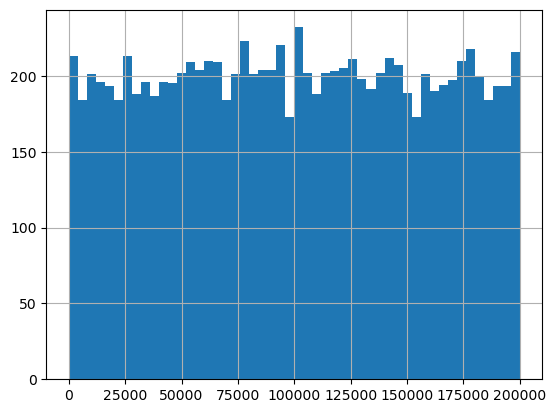

In [14]:
#график распределения
bank_datasets['estimated_salary'].hist(bins=50);

Практически равномерное распределение з/п по количеству пользователей. Так как в данных присутствуют аномально низкие з/п относительно среднего, думаю, можно немного скорректировать удалением з/п, меньшей 2-х перцентилей.

In [15]:
print('Граница 2-х перцентилей:', round(np.percentile(bank_datasets['estimated_salary'], 2),2),\
      ', количество удаляемых строк:', len(bank_datasets[bank_datasets['estimated_salary'] \
                                                         <= np.percentile(bank_datasets['estimated_salary'], 2)]['estimated_salary']))

Граница 2-х перцентилей: 3769.45 , количество удаляемых строк: 200


In [16]:
#удаляем аномалии
bank_datasets = bank_datasets[bank_datasets['estimated_salary'] >= np.percentile(bank_datasets['estimated_salary'], 2)]
bank_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9800 non-null   int64  
 1   score             9800 non-null   int64  
 2   city              9800 non-null   object 
 3   gender            9800 non-null   object 
 4   age               9800 non-null   int64  
 5   objects           9800 non-null   int64  
 6   balance           6269 non-null   float64
 7   products          9800 non-null   int64  
 8   credit_card       9800 non-null   int64  
 9   loyalty           9800 non-null   int64  
 10  estimated_salary  9800 non-null   float64
 11  churn             9800 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 995.3+ KB


In [17]:
# проверка на яные дубликаты
bank_datasets.duplicated().sum()

0

In [18]:
#поищем дубликаты в сочетании нескольких столбцов с user_id
bank_datasets[bank_datasets.duplicated(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'churn'])]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn


In [19]:
#поищем дубликаты в сочетании нескольких столбцов без user_id
bank_datasets[bank_datasets.duplicated(['score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'churn'])]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
7899,15726296,642,Ярославль,Ж,40,7,NaN,2,1,0,183963.34,0
8857,15853562,624,Ярославль,М,36,6,NaN,2,0,0,84749.96,0


In [20]:
#удаляем
bank_datasets = bank_datasets.drop_duplicates(subset=['score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'churn'], keep="last")

In [21]:
bank_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9798 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9798 non-null   int64  
 1   score             9798 non-null   int64  
 2   city              9798 non-null   object 
 3   gender            9798 non-null   object 
 4   age               9798 non-null   int64  
 5   objects           9798 non-null   int64  
 6   balance           6269 non-null   float64
 7   products          9798 non-null   int64  
 8   credit_card       9798 non-null   int64  
 9   loyalty           9798 non-null   int64  
 10  estimated_salary  9798 non-null   float64
 11  churn             9798 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 995.1+ KB


* **Предобработка, итоги**:
    + наименования столбцов приведены к единому стилю;
    + проведено исследование пропусков;
    + аномально низкая з/п в столбце estimated_salary скорректирована значением 2-х перцентилей;
    + явные дубликаты не обнаружены;
    + удалены неявные дубликаты.

## Исследовательский анализ данных (EDA)

Начнем ИДА с небольшого описания данных.

In [22]:
bank_datasets.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,9.798000e+03,9798.000000,9798.000000,9798.000000,6269.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,1.573393e+07,650.421208,38.928149,5.015513,119865.910086,1.529598,0.705654,0.515309,102105.538603,0.204532
std,7.192522e+04,96.596426,10.488543,2.891662,30085.320496,0.583090,0.455771,0.499791,56336.866244,0.403379
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,3769.710000,0.000000
25%,1.567144e+07,584.000000,32.000000,3.000000,100249.410000,1.000000,0.000000,0.000000,54130.627500,0.000000
50%,1.573416e+07,652.000000,37.000000,5.000000,119919.120000,1.000000,1.000000,1.000000,102003.775000,0.000000
75%,1.579626e+07,717.000000,44.000000,7.000000,139532.340000,2.000000,1.000000,1.000000,150124.865000,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [23]:
bank_datasets.median().T

C:\Users\Дарья\AppData\Local\Temp\ipykernel_3784\2205843662.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bank_datasets.median().T


user_id             1.573416e+07
score               6.520000e+02
age                 3.700000e+01
objects             5.000000e+00
balance             1.199191e+05
products            1.000000e+00
credit_card         1.000000e+00
loyalty             1.000000e+00
estimated_salary    1.020038e+05
churn               0.000000e+00
dtype: float64

* Максимальный скоринг - 850, минимальный - 350, медиана и среднее примерно равны - 652 и 650 соответственно. 
* Возраст клиентов от 18 до 92 лет говорит о том, что линейка продуктов в банке ориентирована на все возрастные категории.
* Число объектов у клиентов от 0 до 10, одинаковые среднее и медиана свидетельствует о нормальном распределении.
* Средний и медианный баланс клиентов банка около 120000.
* Средний и медианный доход клиентов банка равны.
* Максимальное количество продуктов - 4, минимальное - 1, в среднем у клиентов банка 1.5 продукта.
* Кредитных карт в среднем 0.7 - не у каждого клиента.

In [24]:
bank_datasets['city'].value_counts()

Ярославль         4900
Ростов Великий    2460
Рыбинск           2438
Name: city, dtype: int64

В данных представлены три города, большинсто клиентов банка из Ярославля.

In [25]:
bank_datasets['gender'].value_counts()

М    5348
Ж    4450
Name: gender, dtype: int64

По гендерному признаку клиенты поделены примерно поровну.

In [26]:
bank_datasets['loyalty'].value_counts()

1    5049
0    4749
Name: loyalty, dtype: int64

Активных клиентов чуть больше неактивных.

In [27]:
bank_datasets['churn'].value_counts()

0    7794
1    2004
Name: churn, dtype: int64

Примерно 20% клиентов банка ушли в отток.

Посмотрим на распределение числовых и категориальных признаков.

In [28]:
#функция для отрисовки распределения числовых признаков
warnings.filterwarnings('ignore') # отключаем предупреждения
def func_hist(data, column):
    fig, ax = plt.subplots(figsize = (15, 5))
    sns.distplot(data[column], color="#72AEEB", ax = plt.subplot(1, 2, 1))
    plt.xlabel('Распределение признака {}'.format(column))
    plt.ylabel('Частота')
    df_boxpl = data.groupby([col, 'products']).agg(count=('user_id', 'count')).reset_index()
    sns.boxplot(y = column, data = df_boxpl, ax = plt.subplot(1, 2, 2), color="#72AEEB") 
    plt.xlabel('')
    plt.ylabel(column)
    plt.suptitle('Признак {}'.format(column))
    plt.show()

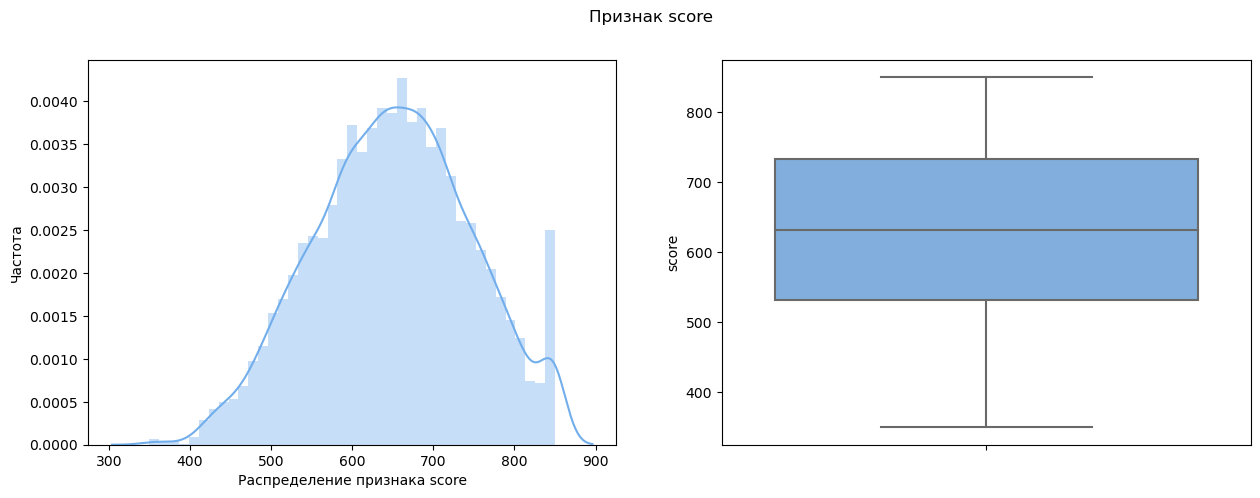

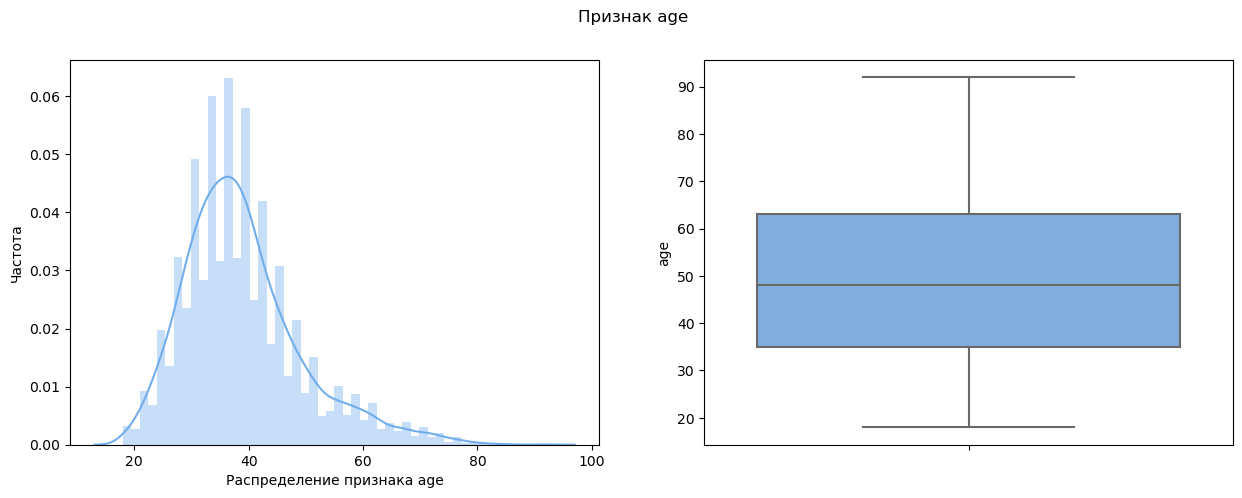

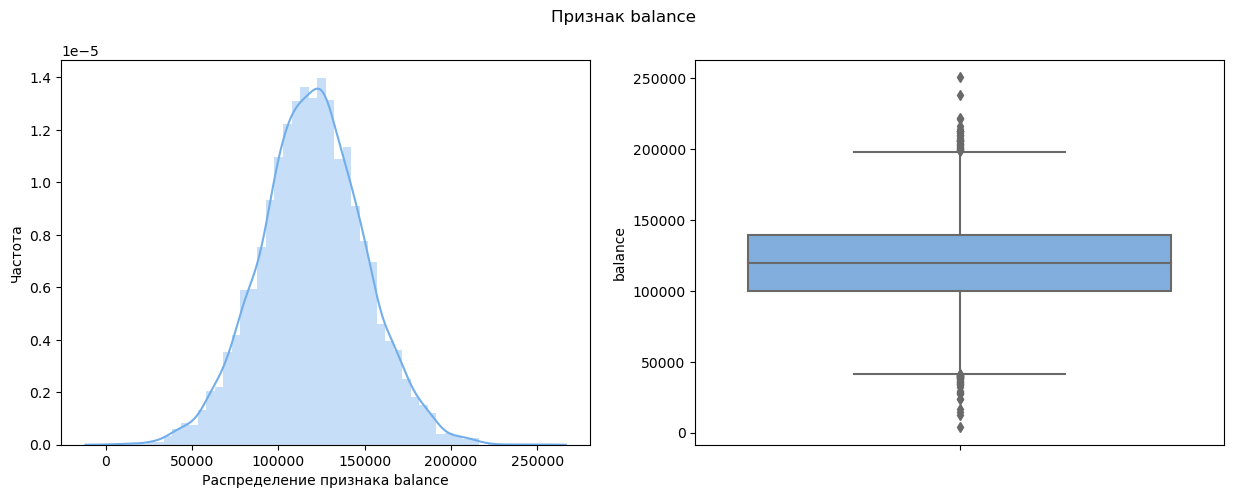

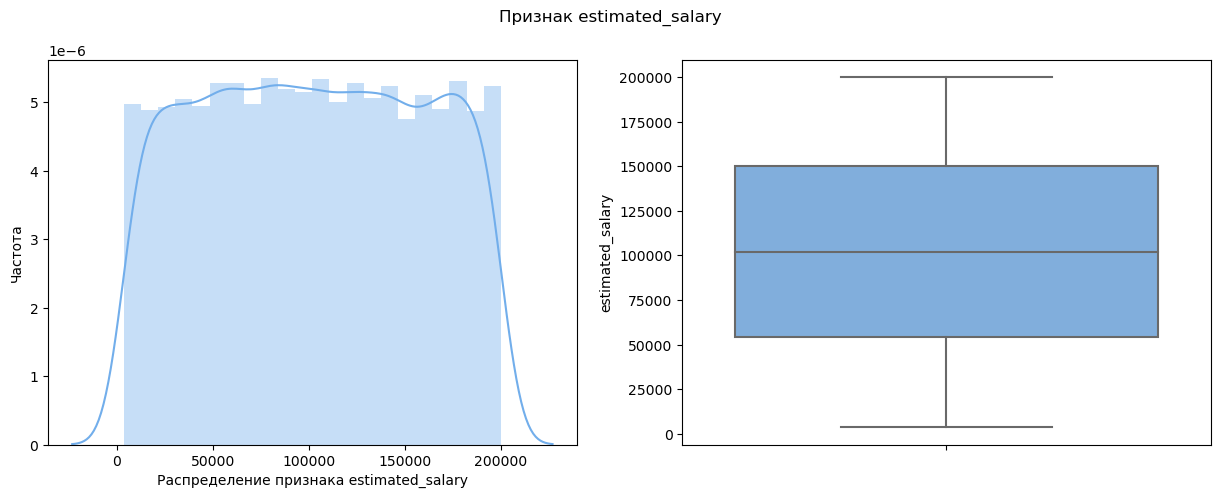

In [29]:
for col in ['score', 'age', 'balance', 'estimated_salary']:
    func_hist(bank_datasets, col)

Нормальные распределения у скоринга, возраста и баланса. Доход распределен равномерно. Есть выбросы в балансе. У скоринга есть всплеск на максимальном значении.

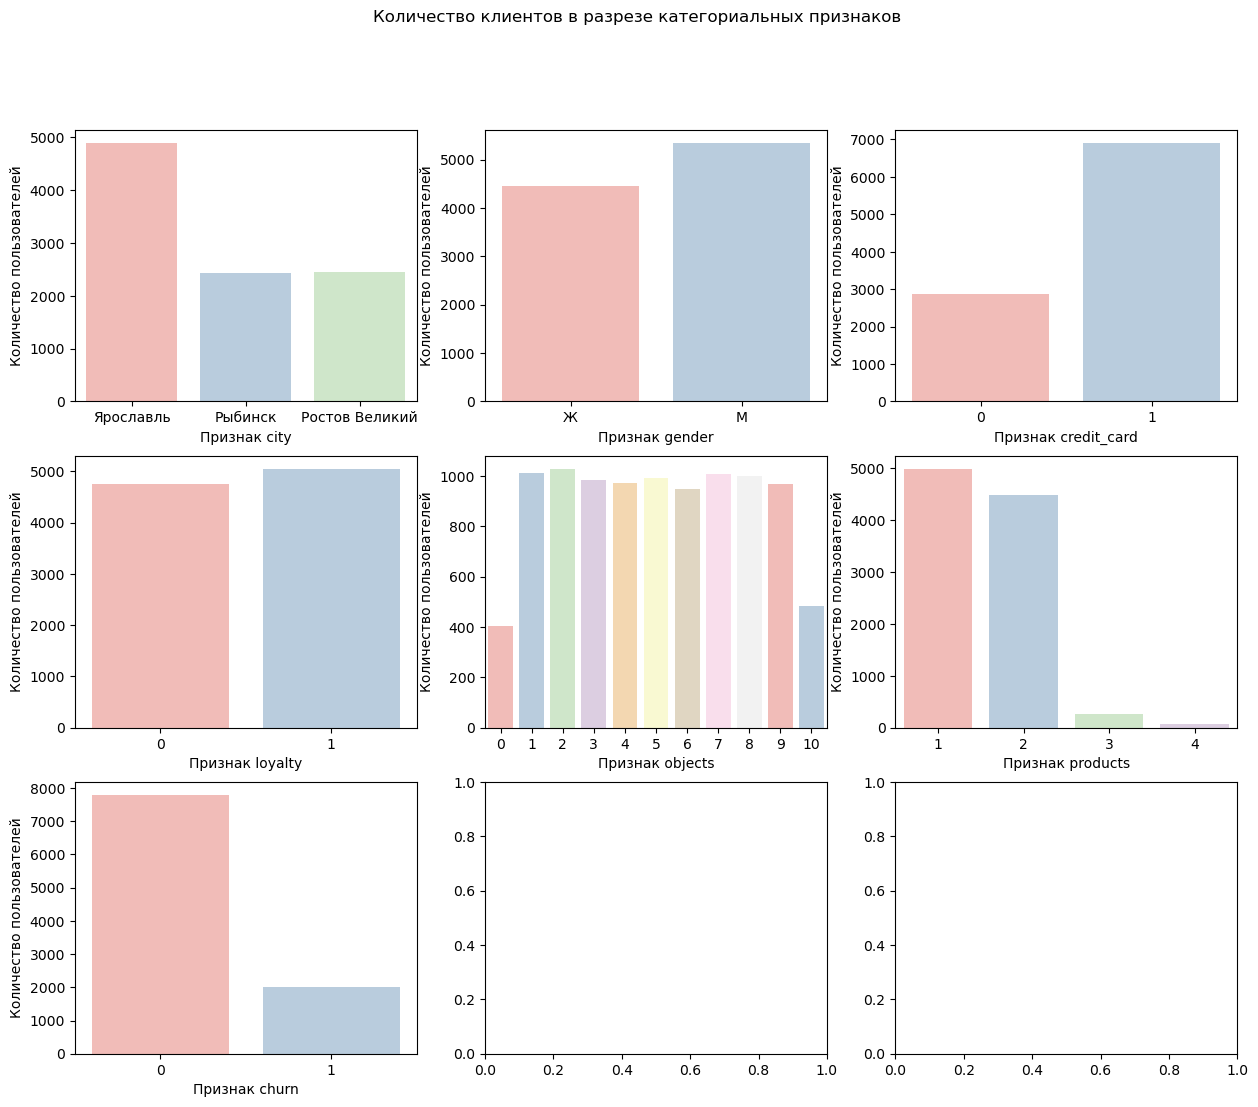

In [30]:
#рисуем распределение категориальных признаков
list_1 = ['city', 'gender', 'credit_card', 'loyalty', 'objects', 'products', 'churn']
fig, ax = plt.subplots(3, 3, figsize = (15, 12))
for col, i in zip(list_1, ax.flatten()):
    sns.countplot(x = col, data = bank_datasets, ax=i, palette='Pastel1')
    i.set_ylabel('Количество пользователей')
    i.set_xlabel('Признак {}'.format(col))
    plt.show
fig.suptitle("Количество клиентов в разрезе категориальных признаков");

* В Ярославле практически столько же клиентов банка, как в двух других городах.
* Чуть меньше женщин среди клиентов банка.
* Кредитными картами пользуются около 70% клиентов.
* Количество активных и неактивных клиентов практически не отличается.
* Меньше всего клиентов c 0 и 10 объектами, осатльные распределены равномерно.
* Большинство клиентов имеют не больше 2-х продуктов.
* В оттоке 20% клиентов банка.

Подготовим данные для выявления зависимостей - преобразуем категориальные переменные (city и gender) к количественным.

In [31]:
#функция преобразования данных столбца gender
def gendrer_coding(gender):
    try:
        if gender == 'М':
            return 1
        else:
            return 0
    except:
        pass

In [32]:
df = bank_datasets.loc[:,~bank_datasets.columns.isin(['user_id'])]
df['city_obj'] = bank_datasets['city']
df['gender_obj'] = df['gender'].apply(gendrer_coding)
df = pd.get_dummies(df, columns=['city'])
df.head(10)

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_obj,gender_obj,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,619,Ж,42,2,NaN,1,1,1,101348.88,1,Ярославль,0,0,0,1
1,608,Ж,41,1,83807.86,1,0,1,112542.58,0,Рыбинск,0,0,1,0
2,502,Ж,42,8,159660.80,3,1,0,113931.57,1,Ярославль,0,0,0,1
3,699,Ж,39,1,NaN,2,0,0,93826.63,0,Ярославль,0,0,0,1
4,850,Ж,43,2,125510.82,1,1,1,79084.10,0,Рыбинск,0,0,1,0
5,645,М,44,8,113755.78,2,1,0,149756.71,1,Рыбинск,1,0,1,0
6,822,М,50,7,NaN,2,1,1,10062.80,0,Ярославль,1,0,0,1
7,376,Ж,29,4,115046.74,4,1,0,119346.88,1,Ростов Великий,0,1,0,0
8,501,М,44,4,142051.07,2,0,1,74940.50,0,Ярославль,1,0,0,1
9,684,М,27,2,134603.88,1,1,1,71725.73,0,Ярославль,1,0,0,1


Для выявления зависимостей будем использовать корреляцию phik, которая ищет не только линейные зависимости.

In [33]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['score', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'gender_obj', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль']


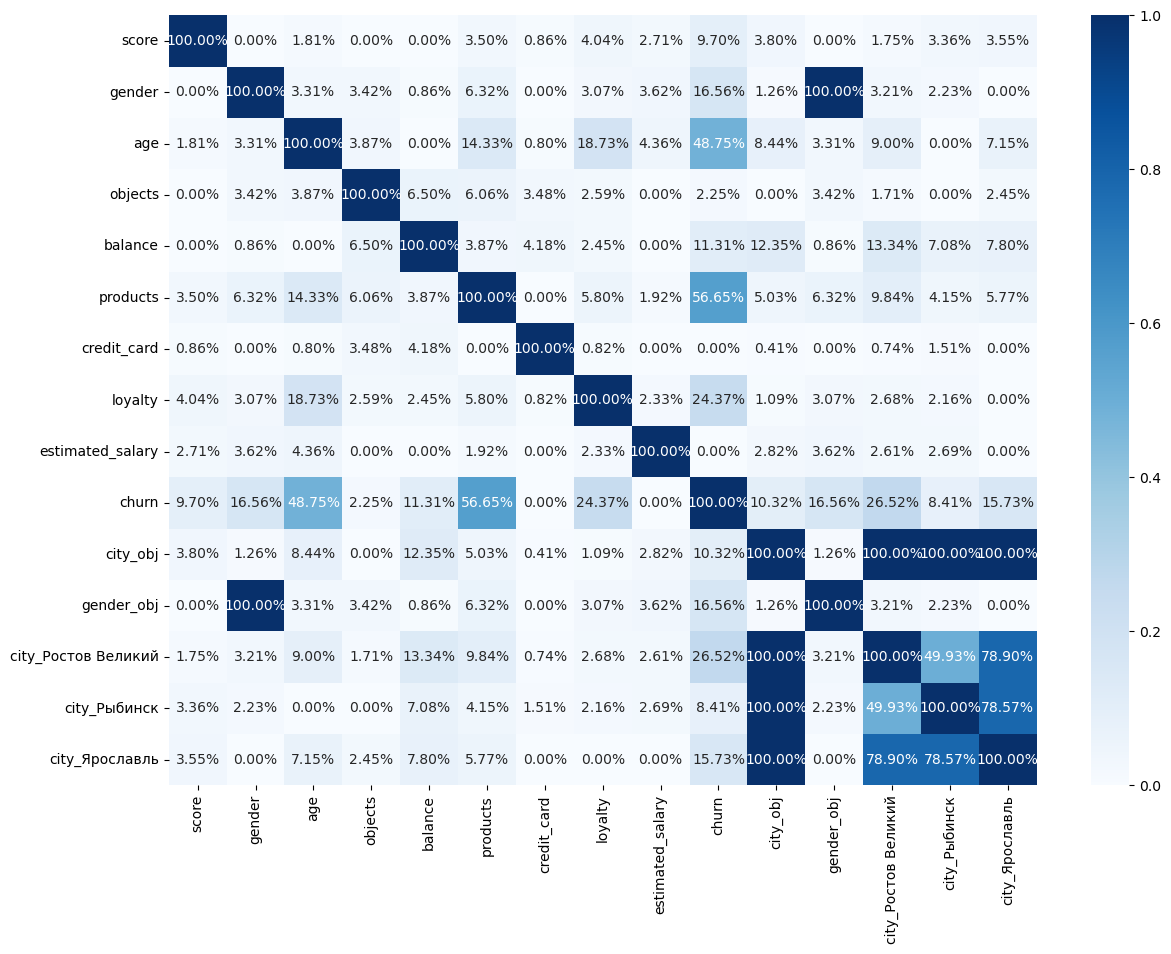

In [34]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(phik_overview, annot=True, ax=ax, cmap='Blues', fmt='0.2%');

Самые сильные зависимости признаков churn от products (56,65%),churn от age(48,75%),churn от city(конкретно от Ростова - 26,52%).

* **EDA, итоги**:
    + Все числовые признаки распределены нормально, кроме дохода - равномерное распределение.
    + Распределение категориальных признаков следующее: 
    город - 50% клиентов из Ярославля; гендер - мужчин боьше женщин на 5%; кредитные карты - 70%; активность распределена равномерно; 9% клиентов имеют 0 или 10 объектов, 1-9 объектов распределены равномерно; 96% клиентов имеют не больше 2-х продуктов; отток - 20% клиентов банка.
    + Корреляционный анализ выявил зависимости между оттоком и количеством продуктов, оттоком и возрастом, оттоком и городом Ростов Великий.

## Сегментирование

### Распределение произнаков в разрезе количества продуктов

In [35]:
bank_datasets.groupby('products').agg(count=('user_id','count')).reset_index()

,products,count
0,1,4994
1,2,4479
2,3,265
3,4,60


Большинство клиентов банка имеют 1 или 2 продукта. Посмотрим на средние значения признаков по количеству продуктов.

In [36]:
bank_datasets.groupby('products').agg('mean').T

products,1,2,3,4
user_id,1.573274e+07,1.573498e+07,1.574176e+07,1.571936e+07
score,6.488791e+02,6.522795e+02,6.473585e+02,6.535833e+02
age,3.965519e+01,3.777406e+01,4.320377e+01,4.568333e+01
objects,4.973168e+00,5.059612e+00,5.003774e+00,5.300000e+00
balance,1.199294e+05,1.197093e+05,1.194757e+05,1.222606e+05
credit_card,7.042451e-01,7.070775e-01,7.132075e-01,6.833333e-01
loyalty,5.038046e-01,5.338245e-01,4.264151e-01,4.833333e-01
estimated_salary,1.012479e+05,1.028727e+05,1.046988e+05,1.047637e+05
churn,2.773328e-01,7.590980e-02,8.264151e-01,1.000000e+00


В средних значениях признаков есть небольшие различия в ***скоринге*** (у клиентов с 2-мя и 4-мя продуктами он выше), в ***возрасте*** (клиенты с 1 или 2-мя продуктами моложе), в ***активности*** (акивнее также клиенты с 1-2 продуктами). В ***оттоке*** все клиенты с 4-мя продуктами, меньше всего отток у клиентов с 1 продуктом, примерно одинаковый средний уровень оттока у клиентов с 2-3 продуктами. Посмотрим на распределение признаков в разрезе количества продуктов.

In [37]:
#функция для визуализации распределения количественных признаков в разрезе количества продуктов
def func_hist_prod(data, column):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.histplot(data = data, x = column, hue = 'products', stat = 'density', common_norm = False, palette="flag", ax = ax)
    plt.xlabel('Распределение признака {}'.format(column))
    plt.ylabel('Частота')
    plt.suptitle('Признак {}'.format(column))
    plt.show()

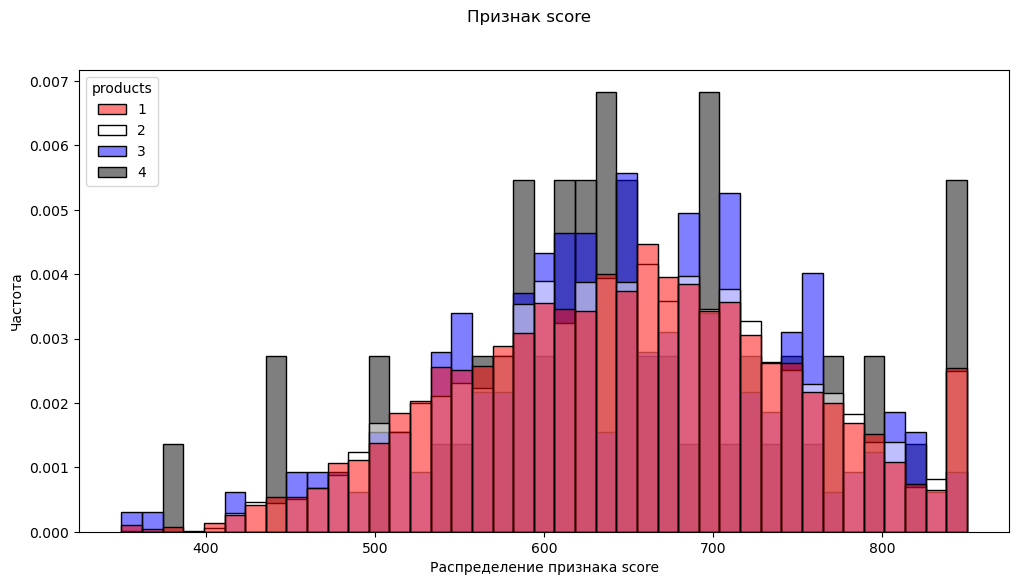

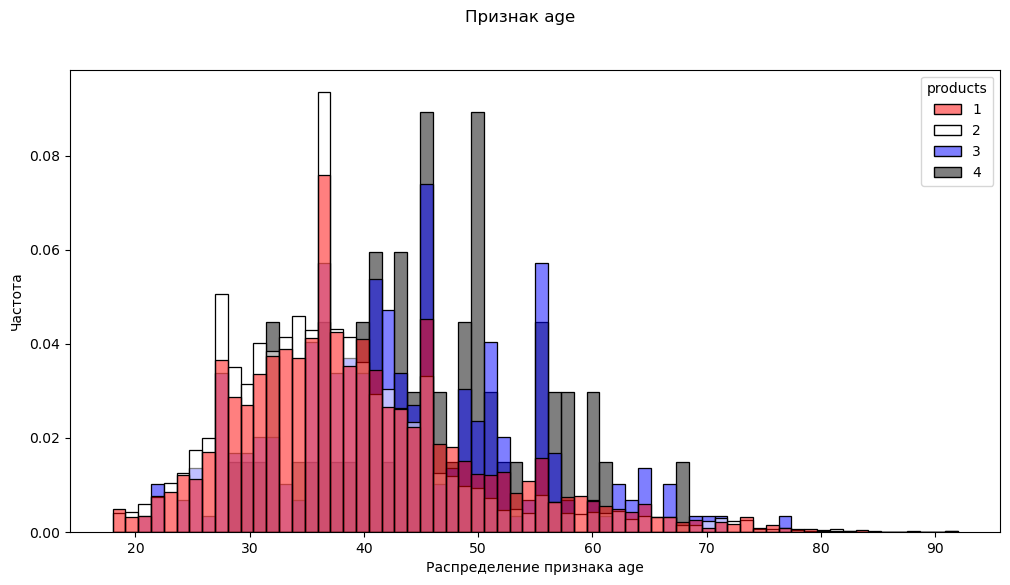

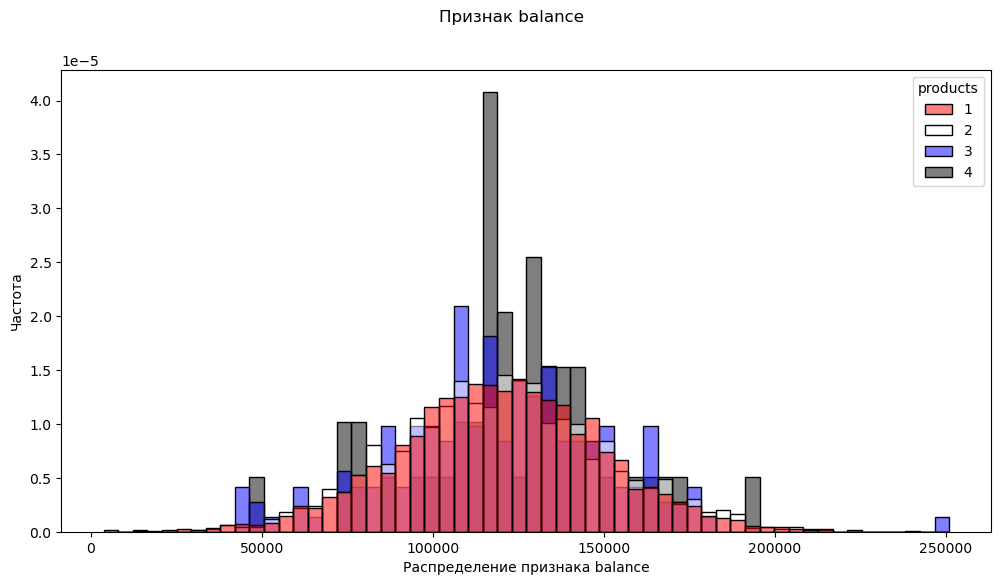

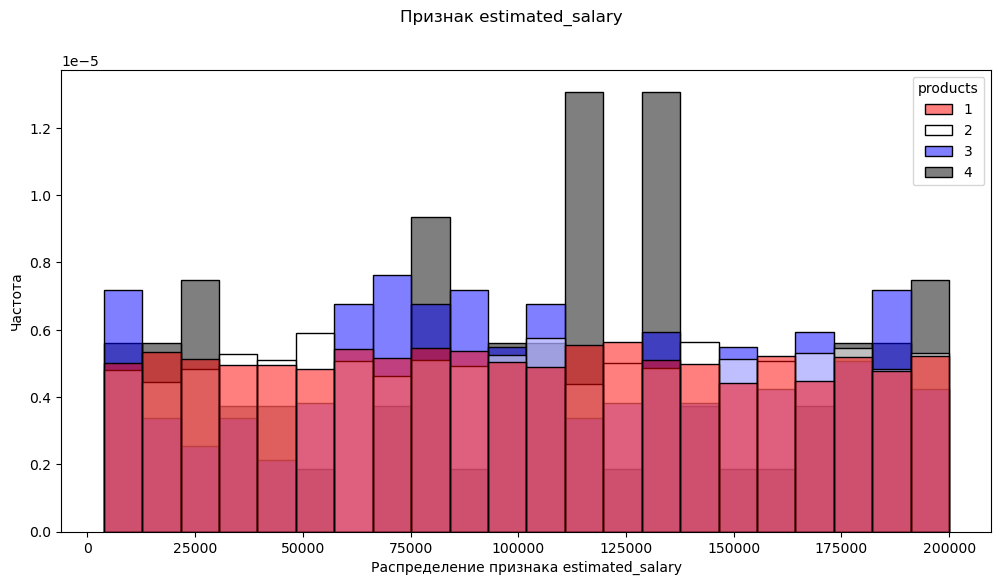

In [38]:
for col in ['score', 'age', 'balance', 'estimated_salary']:
    func_hist_prod(bank_datasets, col)

В целом видно, что основная масса клиентов распределена на 1-2 продуктах. Отмечу несколько особенностей.
* ***Скоринг:*** 
    + Много максимальных скорингов у клиентов с 4-мя продуктами
* ***Возраст:***
    + До 40 лет основная масса клиентов с 1-2 продуктами, после 40 лет добавляются 3 и 4 продукта.
* ***Баланс:***
    + Есть один выдающийся пик количества клиентов с 4-мя продуктами на балансе в 125000.
* ***З.п:***
    + У з/п на значениях чуть меньше и чуть больше 125000 тоже есть выдающиеся пики количества клиентов с 4-мя продуктами.

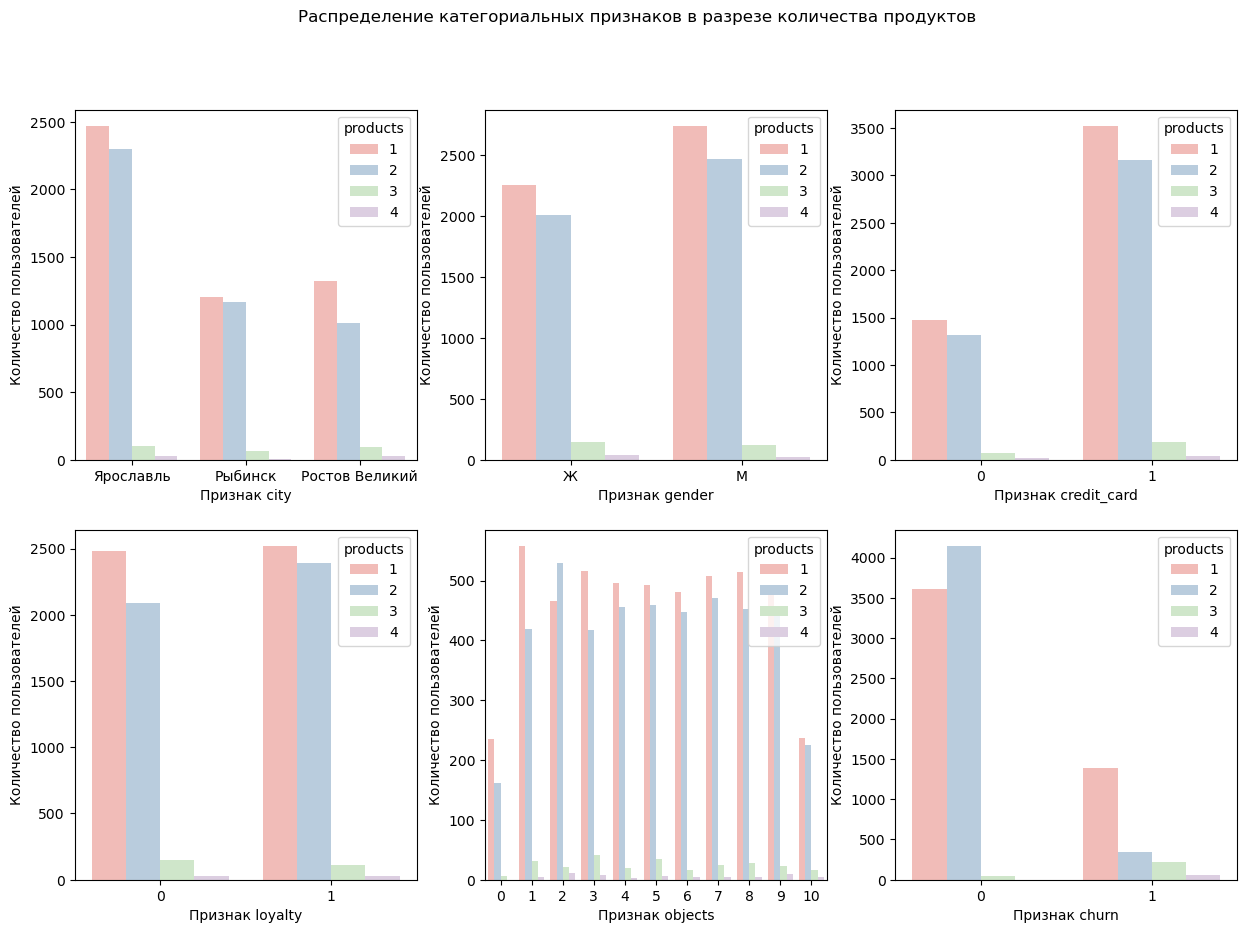

In [39]:
#визуализация распределения категриальных признаков в разрезе количества продуктов
list_2 = ['city', 'gender', 'credit_card', 'loyalty', 'objects', 'churn']
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for col, i in zip(list_2, ax.flatten()):
    sns.countplot(x = col, data = bank_datasets, hue = 'products', ax=i, palette='Pastel1')
    i.set_ylabel('Количество пользователей')
    i.set_xlabel('Признак {}'.format(col))
    plt.show
fig.suptitle("Распределение категориальных признаков в разрезе количества продуктов");

В категориальных признаках в лидерах по количеству продуктов также клиенты с 1-2 продуктами.

### Распределение произнаков в разрезе оттока

In [40]:
bank_datasets.groupby('churn').agg(count=('user_id','count')).reset_index()

,churn,count
0,0,7794
1,1,2004


В оттоке меньшинство, уже радует. Посмотрим на средние значения признаков в разрезе оттока.

In [41]:
bank_datasets.groupby('churn').agg('mean').T

churn,0,1
user_id,1.573416e+07,1.573303e+07
score,6.517623e+02,6.452056e+02
age,3.741186e+01,4.482535e+01
objects,5.039004e+00,4.924152e+00
balance,1.196235e+05,1.206279e+05
products,1.542853e+00,1.478044e+00
credit_card,7.070824e-01,7.000998e-01
loyalty,5.551706e-01,3.602794e-01
estimated_salary,1.018475e+05,1.031092e+05


Средний возраст отточных клиентов больше, активность меньше (что логично).

In [42]:
def func_hist_churn(data, column):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(data = data, x = column, hue = 'churn', stat = 'density', common_norm = False, palette="flag", ax = ax)
    ax.set_xlabel('Распределение признака {}'.format(column))
    ax.set_ylabel('Частота')
    plt.suptitle('Признак {}'.format(column))
    plt.show()

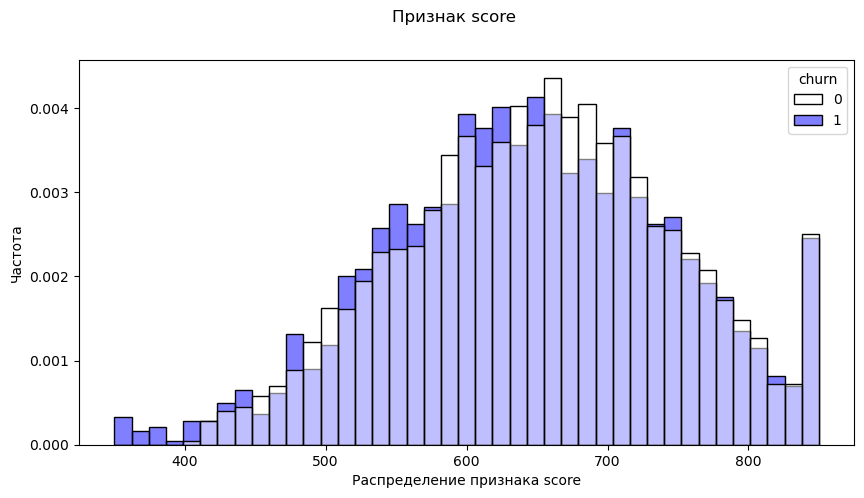

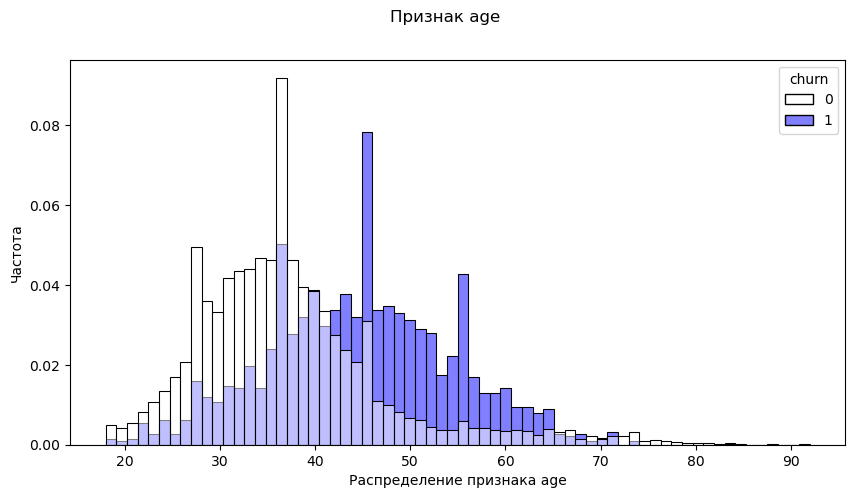

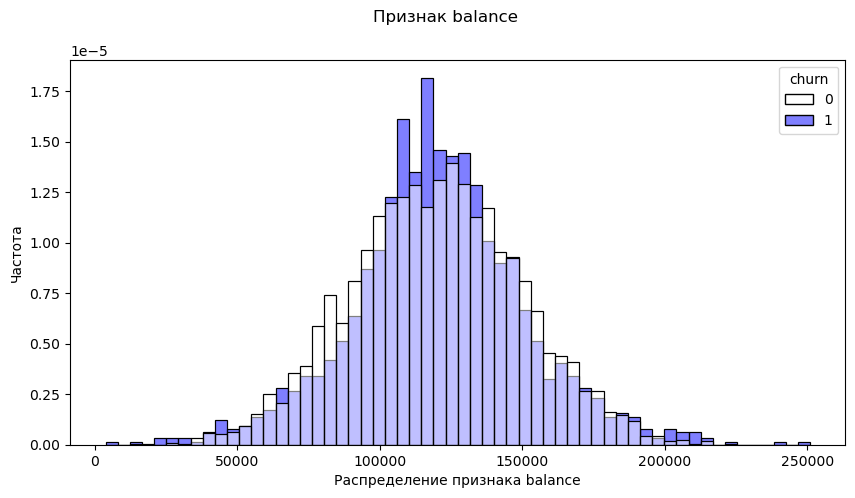

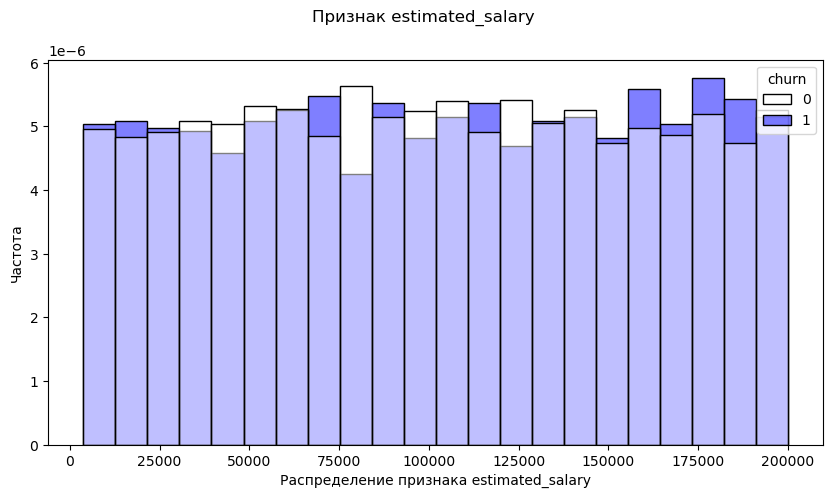

In [43]:
for col in ['score', 'age', 'balance', 'estimated_salary']:
    func_hist_churn(bank_datasets, col)

* Уходят в отток
    + от 45 лет (нет продуктов для клиентов от 45)
    + с самым частотным балансом (около 125000), немного с минимальными и немного с максимальными (нет продуктов для маленьких денег и больших) 

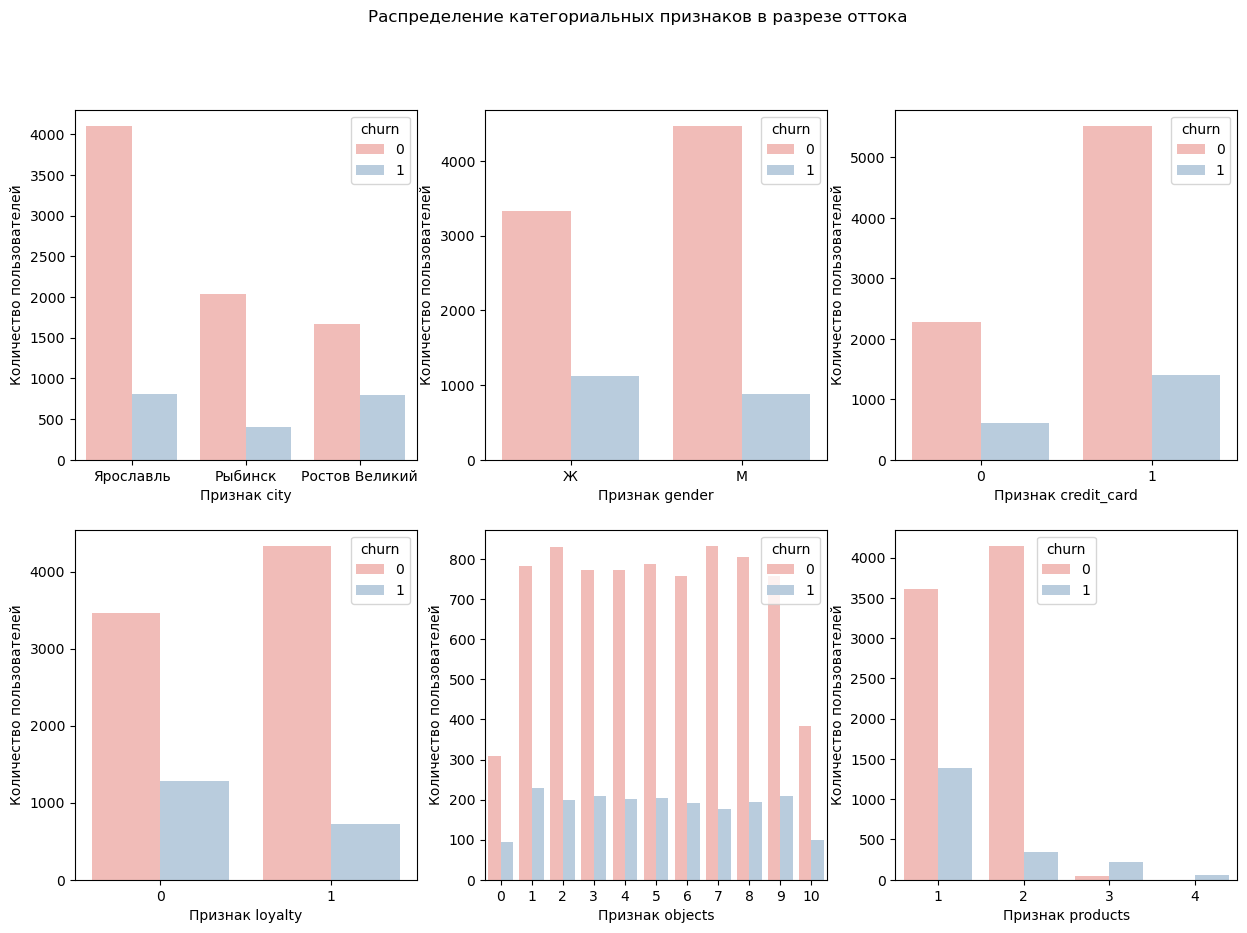

In [44]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for col,i in zip(list_1, ax.flatten()):  #используем flatten для прелбразования двумерного массива ax в одномерный
    sns.countplot(x = col, data = bank_datasets, hue = 'churn', ax=i, palette='Pastel1')
    i.set_ylabel('Количество пользователей')
    i.set_xlabel('Признак {}'.format(col))
plt.show
fig.suptitle("Распределение категориальных признаков в разрезе оттока");

Неприятная ситуация с оттоком в Ростове Великом - половина клиентов ушли. Можно ещё отметить, что больше в оттоке женщин, чем мужчин, неактивных клиентов, чем активных, и, у клиентов с 3-мя продуктами отток превысил неотток, а клиенты с 4-мя продуктами в оттоке все.

Считаю целесообразно сделать 3 сегмента из 4-х продуктов, объединив в один сегмент клиентов с 3-мя и 4-мя продуктами, так как они самые малочисленные по количеству клиентов и имеют большой, отностельно 1-2 продуктов, отток. Сделаем таблицу, иллюстрирующую описанные сегменты, в разрезе по относительному оттоку.

In [45]:
#сегменты по количеству продуктов 
segm_table_prod = bank_datasets.pivot_table(index='products', values='churn', aggfunc='sum').reset_index()
segm_table_prod.loc[segm_table_prod['products']==3, 'churn'] = 279
segm_table_prod.drop(labels = [3],axis = 0,  inplace = True)
segm_table_prod.rename(columns={'products':'segments'})
segm_table_prod['% churn'] = round(segm_table_prod['churn']/bank_datasets['churn'].sum()*100, 2)
segm_table_prod

,products,churn,% churn
0,1,1385,69.11
1,2,340,16.97
2,3,279,13.92


Абсолютное большинство отточных клиентов - "владельцы" одного продукта в банке. Исследуем дальше, поделим сегменты по городам и гендеру.

In [46]:
#сегменты одного продукта по городам и полу
segm_table_other = bank_datasets.query('products==1').pivot_table(index=['city','gender'], values='churn', aggfunc='sum').reset_index()
segm_table_other['% churn'] = round(segm_table_other['churn']/bank_datasets['churn'].sum()*100, 2)
segm_table_other

,city,gender,churn,% churn
0,Ростов Великий,Ж,307,15.32
1,Ростов Великий,М,258,12.87
2,Рыбинск,Ж,136,6.79
3,Рыбинск,М,127,6.34
4,Ярославль,Ж,307,15.32
5,Ярославль,М,250,12.48


In [47]:
round(bank_datasets.query('products==1 & gender == "Ж" & city == "Ростов Великий"').mean(),2)

user_id             15729273.37
score                    653.33
age                       40.64
objects                    5.08
balance               119773.76
products                   1.00
credit_card                0.70
loyalty                    0.44
estimated_salary      106967.51
churn                      0.47
dtype: float64

In [48]:
round(bank_datasets.query('products==1 & gender == "Ж" & city == "Ярославль"').mean(),2)

user_id             15734428.65
score                    646.36
age                       39.69
objects                    4.88
balance               118519.23
products                   1.00
credit_card                0.71
loyalty                    0.51
estimated_salary       99384.26
churn                      0.28
dtype: float64

In [49]:
round(bank_datasets.query('products==1 & gender == "М" & city == "Ростов Великий"').mean(),2)

user_id             15734880.54
score                    648.87
age                       40.44
objects                    4.93
balance               120051.67
products                   1.00
credit_card                0.71
loyalty                    0.49
estimated_salary       98716.97
churn                      0.38
dtype: float64

Т.о., в результате исследования клиентов банка по количеству продуктов и оттоку можно выделить следующие сегменты.
* ***1 сегмент:*** Женщины из Ростова Великого, имеющие 1 продукт (в среднем: 40 лет, 5 объектов в собственности, 120 тыс. баланс, 107 тыс доход, 70% из них имеют кредитную карту, 44% - лояльные)
* ***2 сегмент:*** Женщины из Ярославля, имеющие 1 продукт (в среднем: 40 лет, 5 объектов в собственности, 119 тыс. баланс, 99 тыс доход, 71% из них имеют кредитную карту, 51% - лояльные)
* ***3 сегмент:*** Мужчины из Ростова Великого, имеющие 1 продукт (в среднем: 40 лет, 5 объектов в собственности, 120 тыс. баланс, 99 тыс доход, 70% из них имеют кредитную карту, 49% - лояльные)

## Проверка статистических гипотез

### Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

По ИДА мы помним, что общее распределение дохода клиентов банка равномерное. Посмотрим каким является распределение доходов клиентов банка с 1 и 2-мя продуктами.

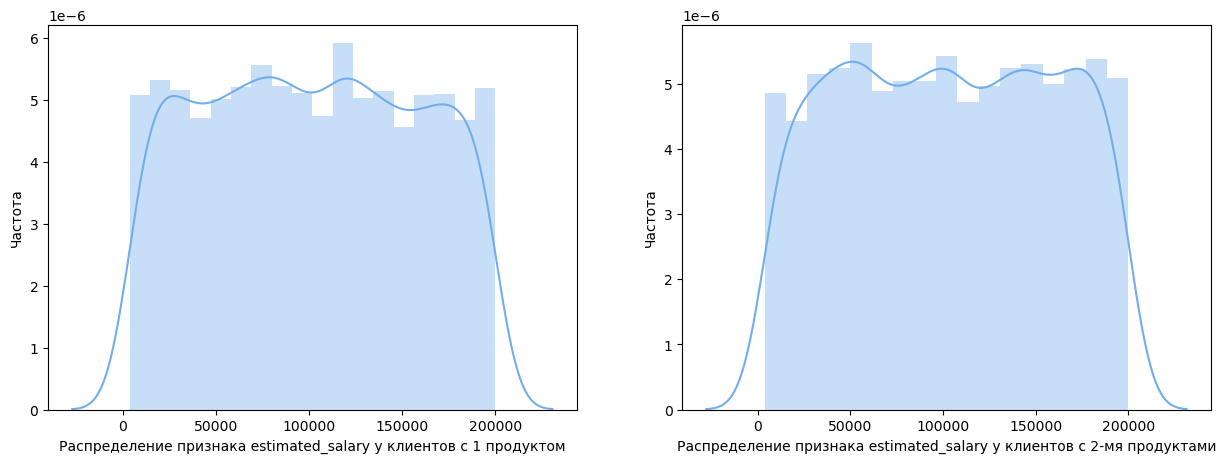

In [50]:
fig, ax = plt.subplots(1,2,figsize = (15, 5))
sns.distplot(bank_datasets.query('products==1')['estimated_salary'], color="#72AEEB", ax = plt.subplot(1, 2, 1))
plt.xlabel('Распределение признака estimated_salary у клиентов с 1 продуктом')
plt.ylabel('Частота')
sns.distplot(bank_datasets.query('products==2')['estimated_salary'], color="#72AEEB", ax = plt.subplot(1, 2, 2))
plt.xlabel('Распределение признака estimated_salary у клиентов с 2-мя продуктами')
plt.ylabel('Частота');

Распределение равномерное. Проверим на нормальность тестом Шапиро-Уилка.

In [51]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(bank_datasets.query('products==1')['estimated_salary'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-значение:  5.271595677786855e-36
Распределение не нормально


In [52]:
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(bank_datasets.query('products==2')['estimated_salary'])
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-значение:  5.438775884852117e-35
Распределение не нормально


В таком случае, для проверки гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним на ненормальном распределении, можно применить непараметрический тест Манна-Уитни. Сформулируем гипотезы.

* *H0* Доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, равны
* *H1* Доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не равны

In [53]:
alpha = 0.05

results = st.mannwhitneyu(
    bank_datasets.query('products == 1')['estimated_salary'], 
    bank_datasets.query('products == 2')['estimated_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16085607692616155
Не получилось отвергнуть нулевую гипотезу


### Проверка гипотезы различия баланса между отточными и неотточными клиентами.

Проверим распределение на нормальность.

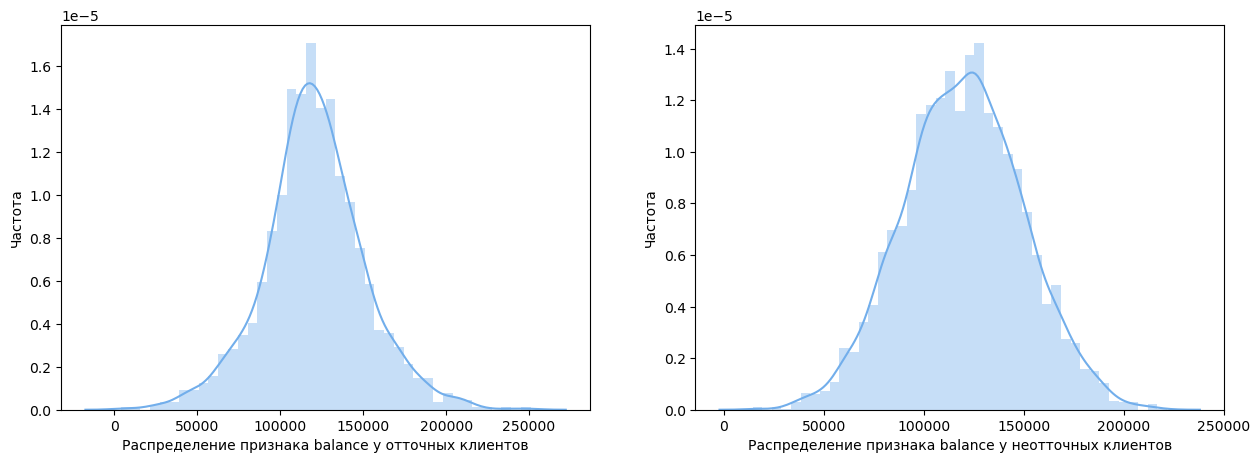

In [54]:
fig, ax = plt.subplots(1,2,figsize = (15, 5))
sns.distplot(bank_datasets.query('churn==1')['balance'], color="#72AEEB", ax = plt.subplot(1, 2, 1))
plt.xlabel('Распределение признака balance у отточных клиентов')
plt.ylabel('Частота')
sns.distplot(bank_datasets.query('churn==0')['balance'], color="#72AEEB", ax = plt.subplot(1, 2, 2))
plt.xlabel('Распределение признака balance у неотточных клиентов')
plt.ylabel('Частота');

Визуально распределения нормальные, поэтому для проверки гипотезы применим ttest с параметром equal_var=False, так как нет оснований полагать, что распределение дисперсий нормально. Сформулируем гипотезы.

* *H0* Средние балансы отточных и неотточных клиентов равны
* *H1* Средние балансы отточных и неотточных клиентов не равны

In [55]:
alpha = 0.05   # критический уровень статистической значимости   

results = st.stats.ttest_ind(bank_datasets.query('churn==1 & balance.notna()')['balance'], 
                             bank_datasets.query('churn==0 & balance.notna()')['balance'],
                             equal_var=False)

print('p-значение: ', results.pvalue)   

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.2635040406338602
Не получилось отвергнуть нулевую гипотезу


##   Выводы

* **В результате анализа данных банка "Метанпромбанк" в контексте выявления сегментов пользователей по количеству продуктов, с обращением особого внимания на отток, можно сформулировать следующие выводы:**
-------------------------------------------------------
* ***"Портрет" среднестатистического пользователя банка:***
    + Жители Ярославля (в большинстве), Рыбинска или Ростова Ведикого от 18 до 92 лет с 5 объектами в собственности со средним доходом 120 тыс. рублей и средним балансом на счете 102 тыс. рублей. Имеют в среднем по 1.5 продукта, и 70% из них - владельцы кредитных карт. 20% из них перестают быть клиентами. 
    
------------------------------------------------------
* ***Особенности данных в разрезе по количеству продуктов:***    
    + Основная масса клиентов распределена на 1-2 продуктах.
    + У клиентов с 2-мя и 4-мя продуктами скоринг выше.
    + Клиенты с 1-2 продуктами моложе и акивнее.
------------------------------------------------------
    
* ***Особенности данных в разрезе оттока:***
    + В оттоке все клиенты с 4-мя продуктами, меньше всего отток у клиентов с 1 продуктом, примерно одинаковый средний уровень оттока у клиентов с 2-3 продуктами.
    + В оттоке клиенты от 45 лет.
    + В оттоке клиенты с самым частотным балансом (около 125000), немного с минимальными и немного с максимальными. 
    + В оттоке - половина клиентов из Ростова Великого. 
    + Больше в оттоке женщин, чем мужчин, неактивных клиентов, чем активных.
------------------------------------------------------
* ***Сегментация по количеству продуктов.***
* На первом этапе сегментирования, исходя из того, что большинство клиентов имеют 1-2 продукта, принято решение объединить клиентов 3-4 продуктов в один сегмент:
    * 1 сегмент - владельцы 1-го продукта.
    * 2 сегмент - владельцы 2-х продуктов.
    * 3 сегмент - владельца 3-4 продуктов.
* Исследование полученных сегментов в разрезе оттока показало, что максимальный отток у владельцев 1-го продукта (69%). Так как цель сегментирования - уменьшение оттока, принято решение рассматривать далее 1-й сегмент и разделить его по высокооточным признакам - городу и гендеру. В результате получили следующие сегменты:
    * ***1 сегмент:*** Женщины из Ростова Великого, имеющие 1 продукт.
    * ***2 сегмент:*** Женщины из Ярославля, имеющие 1 продукт.
    * ***3 сегмент:*** Мужчины из Ростова Великого, имеющие 1 продукт.
-------------------------------------------------------
* ***Проверка статистических гипотез.***
    + Не удалось опровергнуть гипотезу о том, что доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, равны. Т.е., вероятнее всего доходы владельцев 1-го или 2-х продуктов различаются.
    + Не удалось опровергнуть гипотезу о том, что балансы отточных и неотточных клиентов равны - вероятнее всего, балансы отточных и неотточных клиентов отличаются.
--------------------------------------------------------
* ***Рекомендации по уменьшению оттока.***
    + Обратить особое внимание на владельцев 1-го продукта, понять какой это продукт и почему он высокотточен, далее, либо менять условия по существующему продукту, либо вводить альтенативный. 
    + Обратить также внимание на клиентов Ростова Великого. Необходимо проанализировать причины безуспешной адаптации продукта по региональному признаку, с их учетом корректировать существующий продукт или вводить альтернативный под запросы клиентов Ростова Великого.
    + Необходимо проанализировать причины неудовлетворенности продуктами банка женщин из Ярославля, разработать продукт для данного сегмента.
    + С учетом того, что в оттоке клиенты с самым частотным балансом (около 125000), небольшое количесто с минимальными и с максимальными балансами, а также, исходя из того, что вероятнее всего балансы отточных и неотточных клиентов отличаются, необходим дополнительный анализ баланса отточных клиентов для выявления причин оттока. 